In [2]:
# !pip install -q git+https://github.com/huggingface/transformers.git
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=116c43000df325a599eac55fe64f247f4fc6de85c6abb1d107beb0488b4fcdff
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1Oo-rorvE151o38zoidjH2KywC3t1VZPK/view?usp=drivesdk
!unzip -q AI\ Engineer\ Test.zip
!tar -xvf test_data.tar.gz

Downloading...
From: https://drive.google.com/uc?id=1Oo-rorvE151o38zoidjH2KywC3t1VZPK
To: /content/AI Engineer Test.zip
100% 2.18M/2.18M [00:00<00:00, 133MB/s]
test_data/
test_data/test.txt
test_data/hero_names.txt
test_data/test_images/
test_data/test_images/Jinx_630613568339321_round1_Dr.-Mundo_06-04-2021.mp4_65_1.jpg
test_data/test_images/Darius_1115082439004174_round1_Darius_05-19-2021.mp4_45_1.jpg
test_data/test_images/Jinx_v1033497503_round5_Sona_05-25-2021.mp4_85_1.jpg
test_data/test_images/Miss_232154245077306_round1_Lee-Sin_06-14-2021.mp4_23_6.jpg
test_data/test_images/Jinx_182388960412791_round6_Jinx_05-04-2021.mp4_11_2.jpg
test_data/test_images/Darius_826771964607740_round6_Ziggs_06-02-2021.mp4_89_0.jpg
test_data/test_images/Camille_9Aa4KRvaLFA_round5_Ziggs_05-19-2021.mp4_74_1.jpg
test_data/test_images/Akali_817200292250990_round13_Twisted-Fate_05-24-2021.mp4_9_1.jpg
test_data/test_images/Jinx_630613568339321_round1_Dr.-Mundo_06-04-2021.mp4_66_2.jpg
test_data/test_images/Jin

In [4]:
from typing import Callable
import numpy as np
from requests.models import HTTPError
import requests
from bs4 import BeautifulSoup
import wget
import os
from tqdm import tqdm
from pathlib import Path
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from functools import partial
def readlines(fp:str)->list[str]:
  with open(fp, "r") as f:
    lines = f.read().splitlines()
  return lines
def crop_img(img_:np.ndarray, offset=0.25) -> np.ndarray:
    crop_pt = int(img_.shape[0]*(1+offset))
    return img_[:,:crop_pt] if len(img_.shape)==2 else img_[:,:crop_pt, :]


In [5]:
hero_names = readlines("/content/test_data/hero_names.txt")
len(hero_names), hero_names[:5]

(64, ['Draven', 'Evelynn', 'Ezreal', 'Fiora', 'Fizz'])

In [6]:
data_dir = "template"
img_ext = ".png"
template_size = 16*6 #96
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
URL = "https://leagueoflegends.fandom.com/wiki"
rp = requests.get(URL)
srp = BeautifulSoup(rp.content, "lxml")
for img_tag in tqdm(srp.find("ol", {"class":"champion_roster"}).find_all("img")):
  img_url = img_tag.get('data-src')
  img_name = img_tag.get("alt") + img_ext
  img_path = os.path.join(data_dir, img_name)
  if os.path.exists(img_path) or img_tag.get("alt") not in hero_names:
    continue
  scale = template_size/16
  while True:
    try:
      wget.download(img_url.replace("/46?", f"/{int(16*scale)}?"), out=img_path)
    except:
      scale+=1
    break
  else:
    if scale!=img_size/16:
      img = cv2.imread(img_path)
      img = cv2.resize(img, (img_size, img_size))
      cv2.imwrite(img, img_path)

100%|██████████| 163/163 [00:12<00:00, 12.73it/s]


#EDA

In [7]:
test_dir="/content/test_data/test_images"
test_file ="/content/test_data/test.txt"
test_data = [test_line.split("\t") for test_line in readlines(test_file)] #test_img, label
test_data

[['Jinx_630613568339321_round1_Dr.-Mundo_06-04-2021.mp4_65_1.jpg', 'Jinx'],
 ['Darius_1115082439004174_round1_Darius_05-19-2021.mp4_45_1.jpg', 'Darius'],
 ['Jinx_v1033497503_round5_Sona_05-25-2021.mp4_85_1.jpg', 'Jinx'],
 ['Miss_232154245077306_round1_Lee-Sin_06-14-2021.mp4_23_6.jpg',
  'Miss_Fortune'],
 ['Jinx_182388960412791_round6_Jinx_05-04-2021.mp4_11_2.jpg', 'Jinx'],
 ['Darius_826771964607740_round6_Ziggs_06-02-2021.mp4_89_0.jpg', 'Darius'],
 ['Camille_9Aa4KRvaLFA_round5_Ziggs_05-19-2021.mp4_74_1.jpg', 'Camille'],
 ['Akali_817200292250990_round13_Twisted-Fate_05-24-2021.mp4_9_1.jpg',
  'Akali'],
 ['Jinx_630613568339321_round1_Dr.-Mundo_06-04-2021.mp4_66_2.jpg', 'Jinx'],
 ['Jinx_630613568339321_round1_Dr.-Mundo_06-04-2021.mp4_57_2.jpg', 'Jinx'],
 ['Camille_9Aa4KRvaLFA_round5_Ziggs_05-19-2021.mp4_53_0.jpg', 'Camille'],
 ['Darius_1115082439004174_round1_Darius_05-19-2021.mp4_10_1.jpg', 'Darius'],
 ['Ashe_231705051716794_round3_Ashe_06-07-2021.mp4_26_2.jpg', 'Ashe'],
 ['Darius_490569

In [8]:
test_labels = [t[1] for t in test_data]
len(test_labels), len(set(test_labels))

(98, 33)

<Axes: >

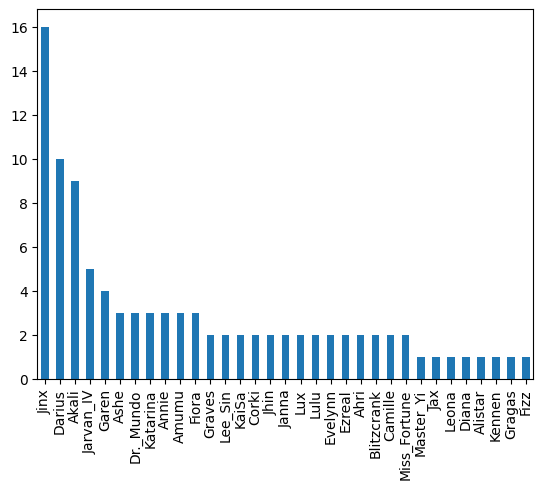

In [9]:
df_labels = pd.Series(test_labels)
df_labels.value_counts().plot(kind='bar')

  0%|          | 0/98 [00:00<?, ?it/s]

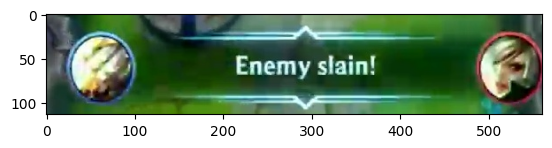

100%|██████████| 98/98 [00:00<00:00, 396.21it/s]

/content/test_data/test_images/Master_142330807963265_round2_Amumu_06-14-2021.mp4_12_3.jpg


In [10]:
for test_img, label in tqdm(test_data):
  test_img_path = os.path.join(test_dir, test_img)
  if "Master_" in test_img[:10]:
    img = cv2.imread(test_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    print(test_img_path)

In [11]:
!mkdir template_correct
correct_dir = "template_correct"

In [12]:
def flip_image(img:np.ndarray):
    flipped = cv2.flip(img, 1)  # 1 indicates horizontal flip
    return flipped

def crop_img_to_center(img:np.ndarray, offset=0.25, center_offset=(0.1,0.1,0.1,0.1)) -> np.ndarray:
    h,w = img.shape[0], img.shape[1]
    crop_pt = int(h*(1+offset))
    img = img[:,:crop_pt] if len(img.shape)==2 else img[:,:crop_pt, :]
    h_crop,w_crop = img.shape[0], img.shape[1]
    l = int(center_offset[0]*w_crop)
    t = int(center_offset[1]*h_crop)
    r = int((1-center_offset[2])*w_crop)
    b = int((1-center_offset[3])*h_crop)
    return img[t:b,l:r] if len(img.shape)==2 else img[t:b,l:r,:]

def correct_template(template_path:str, template_size:tuple[int,int], correct_func:Callable) -> None:
  img_template = cv2.imread(template_path)
  img_template = correct_func(img_template)
  img_template = cv2.resize(img_template, template_size)
  file_name = os.path.basename(template_path).split("_")[0]
  if not file_name.endswith(".png"):
    file_name = file_name  + ".png" 
  if file_name =="Jarvan.png":
      file_name = "Jarvan_IV.png"
  elif file_name == "Dr.png":
      file_name = "Dr._Mundo.png"
  elif file_name == "Miss.png":
      file_name = "Miss_Fortune.png"
  elif file_name == "Master.png":
      file_name = "Master_Yi.png"
  elif file_name == "Lee.png":
      file_name = "Lee_Sin.png"
  save_path = os.path.join(correct_dir,file_name)
  print(save_path)
  cv2.imwrite(save_path, img_template)
  plt.imshow(img_template)
  plt.show()
default_template_size = (template_size, template_size)


template_correct/Jhin.png


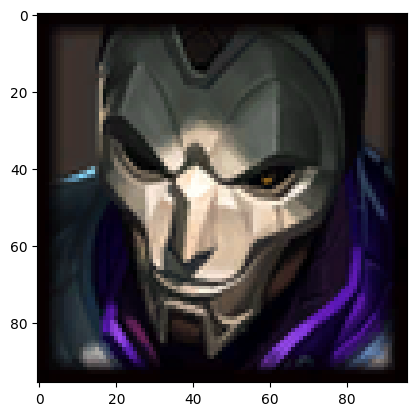

template_correct/Ezreal.png


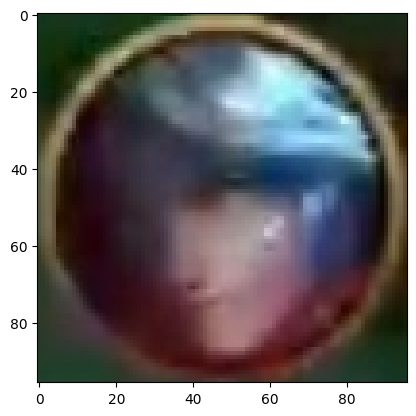

template_correct/Jarvan_IV.png


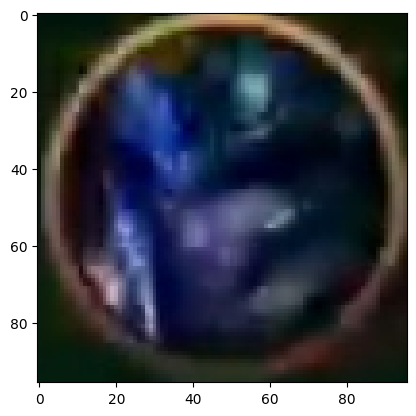

template_correct/Evelynn.png


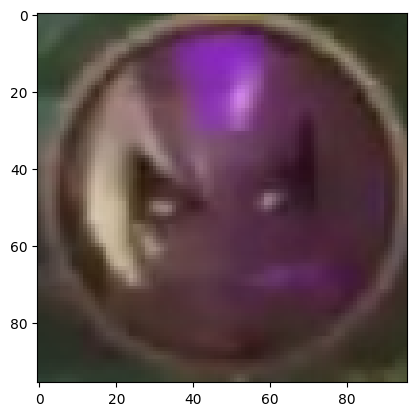

template_correct/Katarina.png


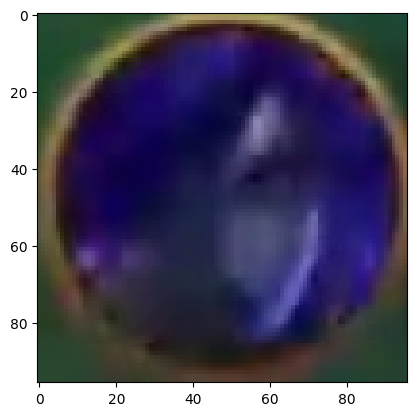

template_correct/Jinx.png


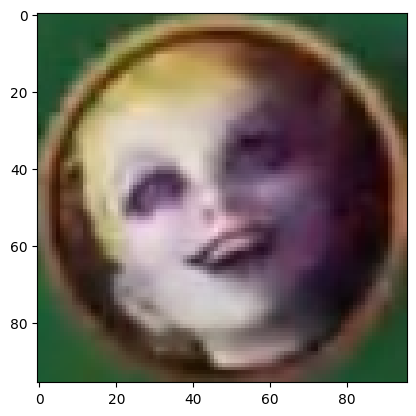

template_correct/Camille.png


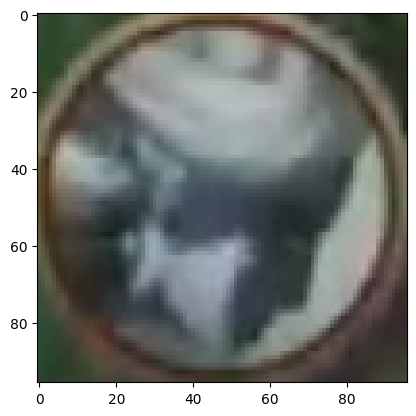

template_correct/KaiSa.png


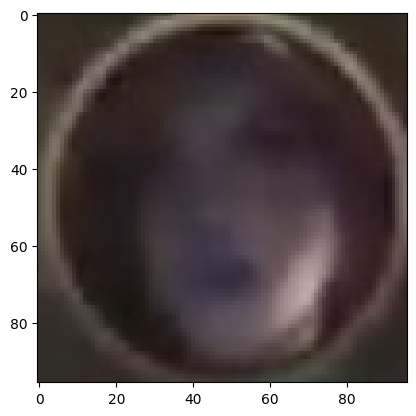

template_correct/Dr._Mundo.png


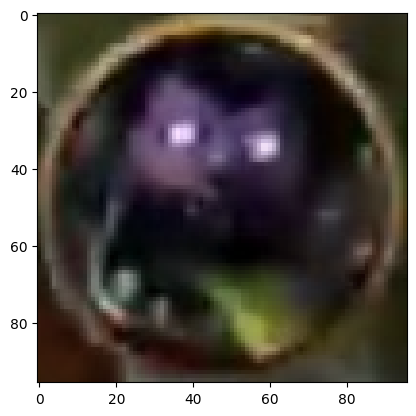

template_correct/Kennen.png


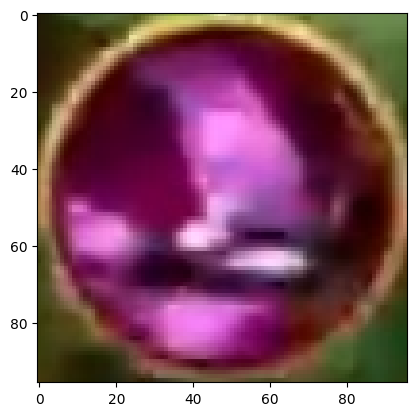

template_correct/Annie.png


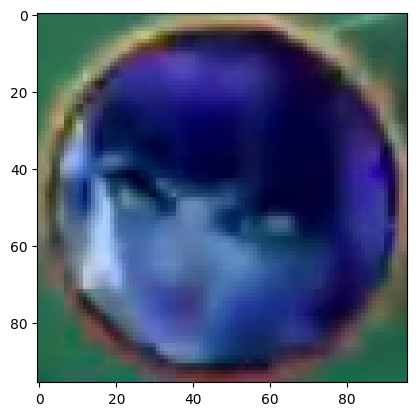

template_correct/Miss_Fortune.png


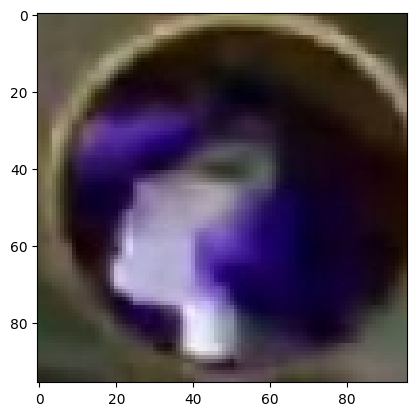

template_correct/Leona.png


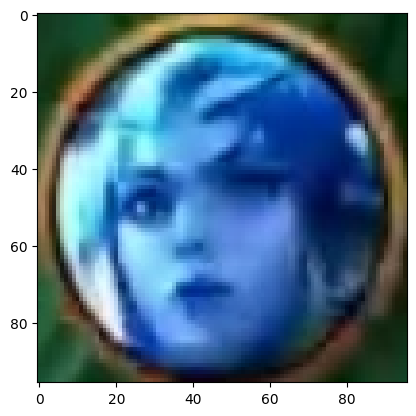

template_correct/Jax.png


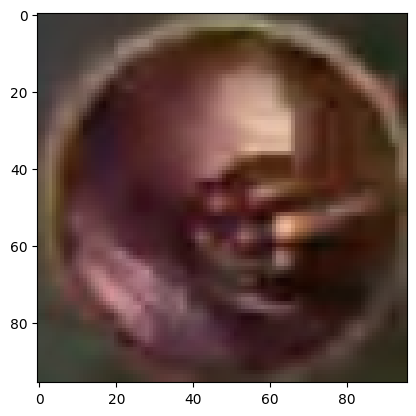

template_correct/Master_Yi.png


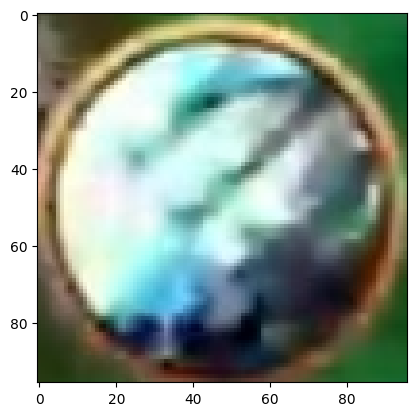

template_correct/Akali.png


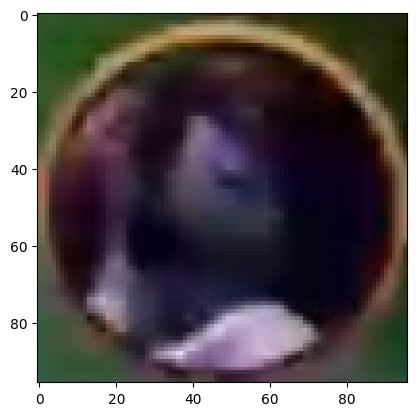

template_correct/Lulu.png


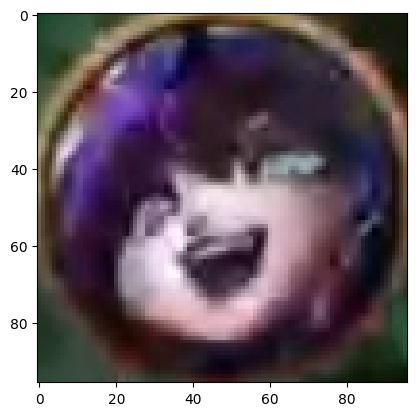

template_correct/Lee_Sin.png


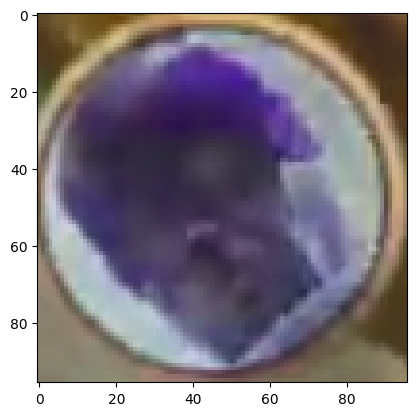

template_correct/Lee_Sin.png


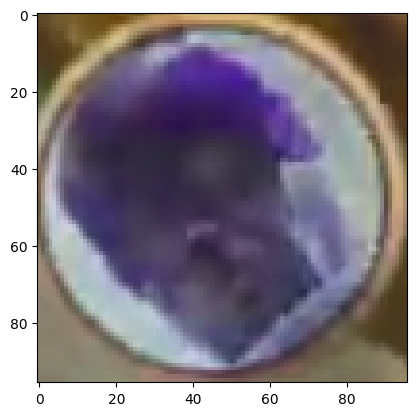

template_correct/Alistar.png


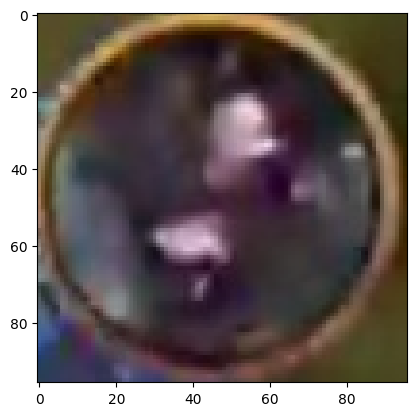

template_correct/Diana.png


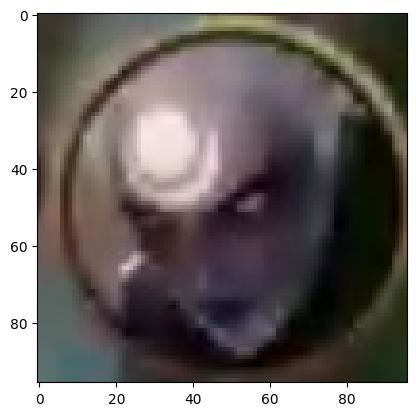

In [13]:
correct_template("/content/template/Jhin.png", default_template_size, flip_image)
correct_template("/content/test_data/test_images/Ezreal_-c47DWO9iuQ_round1_Ezreal_05-27-2021.mp4_10_2.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.18,0.16,0.21,0.09)))
correct_template("/content/test_data/test_images/Jarvan_920174251860258_round6_Jhin_05-22-2021.mp4_36_1.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.2,0.19,0.23,0.11)))
correct_template("/content/test_data/test_images/Evelynn_9Aa4KRvaLFA_round1_Tryndamere_05-19-2021.mp4_37_0.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.22,0.17,0.2,0.11)))
correct_template("/content/test_data/test_images/Katarina_167856652018987_round3_Annie_06-10-2021.mp4_18_7.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.23,0.17,0.18,0.11)))
correct_template("/content/test_data/test_images/Jinx_3165192393581135_round2_Orianna_04-20-2021.mp4_25_2.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.23,0.17,0.18,0.11)))
correct_template("/content/test_data/test_images/Camille_9Aa4KRvaLFA_round5_Ziggs_05-19-2021.mp4_74_1.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.23,0.17,0.18,0.11)))
correct_template("/content/test_data/test_images/KaiSa_9Aa4KRvaLFA_round1_Tryndamere_05-19-2021.mp4_91_1.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.28,0.17,0.12,0.11)))
correct_template("/content/test_data/test_images/Dr_630613568339321_round1_Dr.-Mundo_06-04-2021.mp4_32_3.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.18,0.13,0.22,0.09)))
correct_template("/content/test_data/test_images/Kennen_142330807963265_round5_Vayne_06-14-2021.mp4_25_0.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.16,0.16,0.28,0.1)))
correct_template("/content/test_data/test_images/Annie_2996176217280056_round1_Akali_06-11-2021.mp4_110_3.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.25,0.21,0.2,0.1)))
correct_template("/content/test_data/test_images/Miss_232154245077306_round1_Lee-Sin_06-14-2021.mp4_23_6.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.23,0.01,0.01,0.0)))
correct_template("/content/test_data/test_images/Leona_278220660753197_round2_Olaf_06-02-2021.mp4_10_2.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.18,0.18,0.24,0.13)))
correct_template("/content/test_data/test_images/Jax_3894451770602604_round2_Janna_04-27-2021.mp4_62_2.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.24,0.17,0.18,0.11)))
correct_template("/content/test_data/test_images/Master_142330807963265_round2_Amumu_06-14-2021.mp4_12_3.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.18,0.17,0.28,0.11)))
correct_template("/content/test_data/test_images/Akali_496418424743603_round3_Vayne_06-02-2021.mp4_81_2.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.24,0.17,0.23,0.11)))
correct_template("/content/test_data/test_images/Lulu_188828656421928_round1_Kai'Sa_05-19-2021.mp4_10_1.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.18,0.17,0.23,0.11)))
correct_template("/content/test_data/test_images/Lee_7KOuGlmIhbk_round22_Fiora_06-07-2021.mp4_29_0.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.14,0.17,0.28,0.11)))
correct_template("/content/test_data/test_images/Lee_7KOuGlmIhbk_round22_Fiora_06-07-2021.mp4_29_0.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.14,0.17,0.28,0.11)))
correct_template("/content/test_data/test_images/Alistar_123853103101643_round4_Alistar_06-05-2021.mp4_11_1.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.14,0.17,0.28,0.11)))
correct_template("/content/test_data/test_images/Diana_-c47DWO9iuQ_round1_Ezreal_05-27-2021.mp4_112_2.jpg", default_template_size, partial(crop_img_to_center, center_offset=(0.14,0.17,0.28,0.11)))








In [14]:
!cp /content/template_correct/Jarvan_IV.png /content/template/Jarvan_IV.png
!cp /content/template_correct/Master_Yi.png /content/template/Master_Yi.png
!cp /content/template_correct/Miss_Fortune.png /content/template/Miss_Fortune.png
!cp /content/template_correct/Lee_Sin.png /content/template/Lee_Sin.png
!cp /content/template_correct/Dr._Mundo.png /content/template/Dr._Mundo.png 
!cp /content/template_correct/KaiSa.png /content/template/KaiSa.png 



#Training

In [15]:
class Predictor:
  @staticmethod
  def crop_img(img:np.ndarray, offset=0.25, center_offset=(0.2,0.15,0.15,0.1)) -> np.ndarray:
    h,w = img.shape[0], img.shape[1]
    crop_pt = int(h*(1+offset))
    img = img[:,:crop_pt] if len(img.shape)==2 else img[:,:crop_pt, :]
    h_crop,w_crop = img.shape[0], img.shape[1]
    l = int(center_offset[0]*w_crop)
    t = int(center_offset[1]*h_crop)
    r = int((1-center_offset[2])*w_crop)
    b = int((1-center_offset[3])*h_crop)
    return img[t:b,l:r] if len(img.shape)==2 else img[t:b,l:r,:]

  @staticmethod
  def preprocess_img(img:np.ndarray, blur_kernel=3) -> np.ndarray:
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # To gray image
    img_ = cv2.medianBlur(img_,blur_kernel,0) # lọc nhiễu bằng median blur
    return img_

  @staticmethod
  def get_matching_score(img1:np.ndarray, img2:np.ndarray, des_ ='sift', alg_ = 0, trees_ = 3,  \
      check_= 30, k_ = 2, min_max_count_=4, thres_good_=0.75) -> float:
    img1_ = Predictor.preprocess_img(img1)
    img2_ = Predictor.preprocess_img(img2)
    # tạo bộ trích chọn đặc trưng
    if des_ == 'sift':
        s_ = cv2.xfeatures2d.SIFT_create()
    elif des_ =='surf':
        s_ = cv2.xfeatures2d.SURF_create()
    else:
        raise KeyError('Invalid des')
    # tìm điểm đặc trưng và tính sift cho từng ảnh
    kp1, des1 = s_.detectAndCompute(img1_,None)
    kp2, des2 = s_.detectAndCompute(img2_,None)  
    ## tìm các cặp đặc trưng tương đồng giữa 2 ảnh. Có thể sử dụng phương pháp vét cạn BRUTE_FORCE matching hoặc FLANN hỗ trợ so khớp nhanh hơn
    index_params = dict(algorithm = alg_, trees = trees_) #thuật toán KDTREE -> chia ảnh ra từng vùng nhỏ, match từng vùng (từng tree) với nhau
    search_params = dict(checks=check_)  
    flann = cv2.FlannBasedMatcher(index_params,search_params)  
    matches2 = flann.knnMatch(des1,des2,k=k_) # trả về k=2 features gần nhất từ tập (des1,des2)
    good = []
    for m,n in matches2:
        # print(type(m), type(matches2)) 
        if m.distance < thres_good_*n.distance: # chỉ giữ lại những ghép cặp ổn định (m.distance: khoảng cách gần nhất, n.distance: khoảng cách gần thứ 2)
            good.append(m)
    return len(good)
  @staticmethod
  def get_topk_template(img_path:str, template_dir = "/content/template", template_correct_dir = "/content/template_correct", k=3) ->tuple[str,int]:
    ptemplate_dir = Path(template_dir)
    img = cv2.imread(img_path)
    img = Predictor.crop_img(img)
    res = []
    for template_path in ptemplate_dir.iterdir():
      template_correct_path = os.path.join(template_correct_dir, template_path.name)
      template_img = cv2.imread(str(template_path)) if not os.path.exists(template_correct_path) else cv2.imread(template_correct_path)
      score = Predictor.get_matching_score(img, template_img)
      res.append((score, template_path.stem))
    res = sorted(res, key=lambda x: x[0], reverse=True)
    return res[:k]

  @staticmethod
  def predict(img_path:str):
    topk = Predictor.get_topk_template(img_path)
    # print(topk)
    return topk[0][1]

  @staticmethod
  def eval(test_dir="/content/test_data/test_images", test_file ="/content/test_data/test.txt", wrong_label_paths=[]):
    test_data = [test_line.split("\t") for test_line in readlines(test_file)] #test_img, label
    preds, gts = [], []
    for test_img, label in tqdm(test_data):
      if test_img in wrong_label_paths:
        continue
    #   if label!="Lux":
    #     continue
      test_img_path = os.path.join(test_dir, test_img)
      if test_img_path in wrong_label_paths:
        continue
      pred = Predictor.predict(test_img_path)
      preds.append(pred)
      gts.append(label)
      
    return preds, gts
  
  @staticmethod
  def report(gts, preds, labels_=None):
    print(classification_report(gts, preds, labels=labels_))
    # print(confusion_matrix(preds, gts, labels=labels))


In [16]:
wrong_label_paths = [
    "/content/test_data/test_images/Graves_1398331007194492_round4_Jarvan-IV_04-26-2021.mp4_10_0.jpg", #Jarvan
    "/content/test_data/test_images/Graves_1398331007194492_round4_Jarvan-IV_04-26-2021.mp4_38_6.jpg", #Jarvan
    "/content/test_data/test_images/Jinx_1398331007194492_round1_Master-Yi_04-26-2021.mp4_28_0.jpg",
    "/content/test_data/test_images/Jinx_142330807963265_round5_Vayne_06-14-2021.mp4_153_6.jpg",
    "/content/test_data/test_images/Jinx_1447615885600445_round7_Nami_06-04-2021.mp4_36_2.jpg",
    "/content/test_data/test_images/Jinx_4161501510579966_round2_Fiora_06-10-2021.mp4_23_1.jpg",
    "/content/test_data/test_images/Jinx_570649517229749_round3_Braum_04-22-2021.mp4_37_3.jpg",
]
preds, gts = Predictor.eval(wrong_label_paths=wrong_label_paths)

100%|██████████| 98/98 [01:00<00:00,  1.61it/s]


In [17]:
eval_labels = list(set(test_labels))
eval_labels.remove("Graves")
Predictor.report(gts, preds, labels_=eval_labels)

              precision    recall  f1-score   support

        Jinx       0.91      0.91      0.91        11
        Ahri       1.00      1.00      1.00         2
  Blitzcrank       1.00      0.50      0.67         2
       Janna       1.00      1.00      1.00         2
       Corki       1.00      1.00      1.00         2
      Gragas       1.00      1.00      1.00         1
     Evelynn       0.67      1.00      0.80         2
        Fizz       1.00      1.00      1.00         1
     Alistar       1.00      1.00      1.00         1
      Darius       1.00      0.60      0.75        10
    Katarina       1.00      1.00      1.00         3
     Lee_Sin       1.00      1.00      1.00         2
       Diana       1.00      1.00      1.00         1
   Jarvan_IV       1.00      0.60      0.75         5
         Lux       1.00      1.00      1.00         2
     Camille       1.00      1.00      1.00         2
        Lulu       1.00      1.00      1.00         2
   Master_Yi       1.00    

In [124]:
print([(pred,gt) for pred,gt in zip(preds, gts) if gt=="Ezreal"], sep="\n")

[('Diana', 'Ezreal'), ('Diana', 'Ezreal')]


#TEST

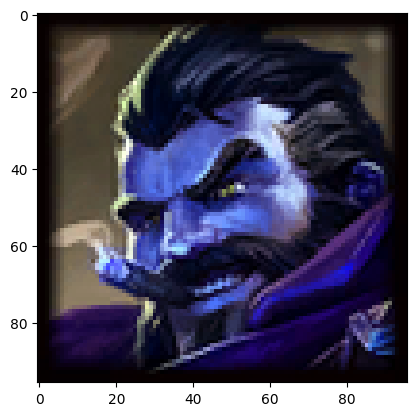

(96, 96, 3)

In [134]:
import cv2
import matplotlib.pyplot as plt
# img1 = cv2.imread("/content/template/Fiora.png")
img1 = cv2.imread("/content/template/Lux.png")
img1 = cv2.imread("/content/template/Diana.png")
img1 = cv2.imread("/content/template/Graves.png")

plt.imshow(img1)
plt.show()
img1.shape

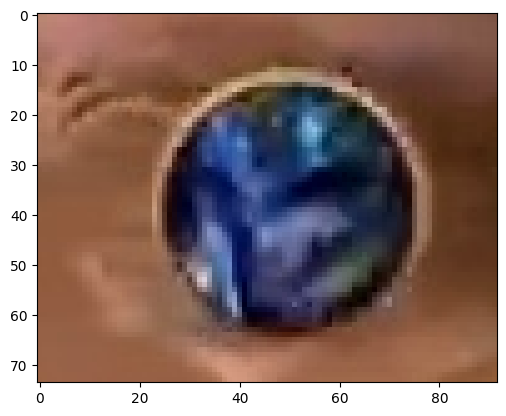

(74, 92, 3)

In [135]:
import cv2
import matplotlib.pyplot as plt
img_path = "/content/test_data/test_images/Lux_1398331007194492_round1_Master-Yi_04-26-2021.mp4_1_1.jpg"
img_path = "/content/test_data/test_images/Graves_1398331007194492_round4_Jarvan-IV_04-26-2021.mp4_10_0.jpg"
img2 = cv2.imread(img_path)
img2 = Predictor.crop_img(img2)
plt.imshow(img2)
plt.show()
img2.shape

4
Not enough matches are found - 4/4


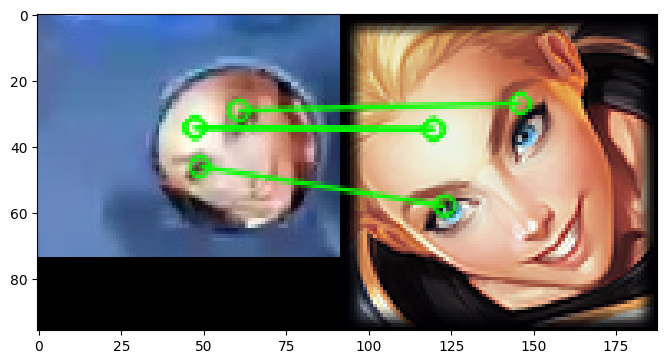

In [ ]:

def image_matching(img1, img2, des_ ='sift', alg_ = 0, trees_ = 5,  \
    check_= 50, k_ = 2, min_max_count_=4, thres_good_=0.7):
    img1_ = Predictor.preprocess_img(img1)
    img2_ = Predictor.preprocess_img(img2)
    # tạo bộ trích chọn đặc trưng
    if des_ == 'sift':
        s_ = cv2.xfeatures2d.SIFT_create()
    elif des_ =='surf':
        s_ = cv2.xfeatures2d.SURF_create()
    else:
        raise KeyError('Invalid des')
    # tìm điểm đặc trưng và tính sift cho từng ảnh
    kp1, des1 = s_.detectAndCompute(img1_,None)
    kp2, des2 = s_.detectAndCompute(img2_,None)
    
    ## tìm các cặp đặc trưng tương đồng giữa 2 ảnh. Có thể sử dụng phương pháp vét cạn BRUTE_FORCE matching hoặc FLANN hỗ trợ so khớp nhanh hơn
    index_params = dict(algorithm = alg_, trees = trees_) #thuật toán KDTREE -> chia ảnh ra từng vùng nhỏ, match từng vùng (từng tree) với nhau
    search_params = dict(checks=check_)

    flann = cv2.FlannBasedMatcher(index_params,search_params)

    matches2 = flann.knnMatch(des1,des2,k=k_) # trả về k=2 features gần nhất từ tập (des1,des2)
    good = []
    for m,n in matches2:
        # print(type(m), type(matches2)) 
        if m.distance < thres_good_*n.distance: # chỉ giữ lại những ghép cặp ổn định (m.distance: khoảng cách gần nhất, n.distance: khoảng cách gần thứ 2)
            good.append(m)
    print(len(good))
    ## khoanh vùng đối tượng tương ứng được tìm thấy
    if len(good)>min_max_count_:
        src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
        dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0) # tìm phép biến đổi đồng dạng giữa 2 tập điểm được so khớp
        matchesMask = mask.ravel().tolist()
        h,w,d = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2) # 4 điểm khoanh vùng trên ảnh nguồn
        dst = cv2.perspectiveTransform(pts,M) # thực hiện biến đổi để tìm ra vị trí tương ứng trong ảnh được so khớp
        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    else:
        print( "Not enough matches are found - {}/{}".format(len(good), min_max_count_) )
        matchesMask = None
        
        ## hiển thị kết quả
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                    singlePointColor = None,
                    matchesMask = matchesMask, # draw only inliers
                    flags = 2)
    img12_ = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(img12_, cv2.COLOR_BGR2RGB))
    plt.show()
# image_matching(img2.copy(), img1.copy())
image_matching(img2.copy(), img1.copy())


# Zero-shot learning

##Pipeline



In [ ]:
from transformers import pipeline
# More models in the model hub.
model_name = "openai/clip-vit-large-patch14-336"
classifier = pipeline("zero-shot-image-classification", model = model_name)


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


KeyboardInterrupt: ignored

In [ ]:
import cv2

def append_images(img1, img2):
    # Get the height and width of both images
    h1, w1, _ = img1.shape
    h2, w2, _ = img2.shape

    # Make sure both images have the same width
    if h1 != h2:
        img2 = cv2.resize(img2, (w2, h1))

    # Stack the two images vertically
    appended_img = cv2.hconcat([img1, img2])

    return appended_img

    return merged_img
def crop_img(img_:np.ndarray, offset=0.25) -> np.ndarray:
    crop_pt = int(img_.shape[0]*(1+offset))
    return img_[:,:crop_pt] if len(img_.shape)==2 else img_[:,:crop_pt, :]

# img = cv2.imread("/content/test_data/test_images/Lux_1398331007194492_round1_Master-Yi_04-26-2021.mp4_1_1.jpg")
# img = cv2.imread("/content/test_data/test_images/Fizz_20zGr1wVrzM_round2_Ezreal_05-27-2021_new.mp4_75_4.jpg")
img = cv2.imread("test_data/test_images/Jinx_1398331007194492_round1_Master-Yi_04-26-2021.mp4_28_0.jpg")

img = crop_img(img)
template = cv2.imread("/content/template/Lux.png")
merged_img = append_images(template, img)
plt.imshow(merged_img)


In [ ]:

image_to_classify = Image.fromarray(merged_img.copy())
hypothesis_template = "This is a photo of {} champion from the game League of Legends."
labels_for_classification =  ["one same", "two different"]
scores = classifier(image_to_classify, candidate_labels = labels_for_classification)
scores


##Metric learning

In [ ]:
import requests
from PIL import Image
from transformers import Pix2StructImageProcessor, Pix2StructVisionModel
from transformers import Pix2StructVisionConfig, Pix2StructVisionModel
import torch 

# Initializing a Pix2StructVisionConfig with google/pix2struct-base style configuration
# configuration = Pix2StructVisionConfig(seq_len=8, hidden_size=16)
image_processor = Pix2StructImageProcessor.from_pretrained("google/pix2struct-textcaps-base")#, max_patches=8)
model = Pix2StructVisionModel.from_pretrained("google/pix2struct-textcaps-base")#, config=configuration)


Some weights of the model checkpoint at google/pix2struct-textcaps-base were not used when initializing Pix2StructVisionModel: ['decoder.layer.10.encoder_decoder_attention.layer_norm.weight', 'encoder.encoder.layer.11.attention.value.weight', 'encoder.encoder.layer.0.mlp.wi_1.weight', 'encoder.encoder.layer.8.mlp.wi_0.weight', 'decoder.layer.3.encoder_decoder_attention.layer_norm.weight', 'decoder.layer.8.self_attention.attention.key.weight', 'decoder.layer.9.encoder_decoder_attention.attention.key.weight', 'decoder.layer.10.encoder_decoder_attention.attention.value.weight', 'encoder.encoder.layer.6.mlp.wo.weight', 'decoder.layer.4.mlp.DenseReluDense.wo.weight', 'decoder.layer.0.encoder_decoder_attention.attention.key.weight', 'decoder.layer.4.encoder_decoder_attention.attention.output.weight', 'decoder.layer.4.self_attention.attention.value.weight', 'encoder.encoder.layer.11.mlp.wo.weight', 'decoder.layer.7.self_attention.layer_norm.weight', 'decoder.layer.4.self_attention.layer_norm.

In [ ]:
template = cv2.imread("/content/template/Lux.png")
def embed_img(img_:np.ndarray) -> np.ndarray:
    inputs = image_processor(images=img1, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state
    last_hidden_states = torch.flatten(last_hidden_states.squeeze())
    return last_hidden_states.cpu().detach().numpy()
embedding = embed_img(template)
embedding.shape

(1572864,)

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity

def get_cosine_similarity(
    X: np.ndarray,
    verbose: bool = True,
    chunk_size: int = 1000,
    threshold: int = 10000,
    num_workers: int = 0,
) -> np.ndarray:
    n_rows = X.shape[0]

    if n_rows <= threshold:
        return cosine_similarity(X)

    else:
        logger.info(
            'Large feature matrix thus calculating cosine similarities in chunks...'
        )
        start_idxs = list(range(0, n_rows, chunk_size))
        end_idxs = start_idxs[1:] + [n_rows]

        if num_workers > 0:
            cos_sim = parallelise(
                cosine_similarity_chunk,
                [(X, idxs) for i, idxs in enumerate(zip(start_idxs, end_idxs))],
                verbose,
                num_workers,
            )
        else:
            cos_sim = tuple(
                cosine_similarity_chunk((X, idxs))
                for idxs in tqdm(zip(start_idxs, end_idxs), total=len(start_idxs))
            )
        return np.vstack(cos_sim)

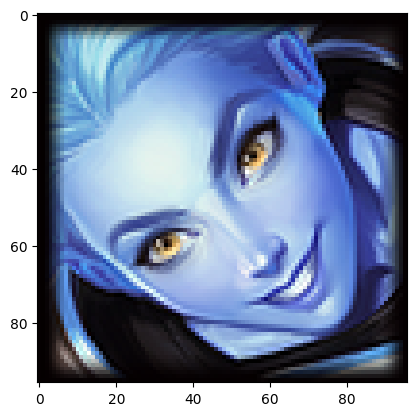

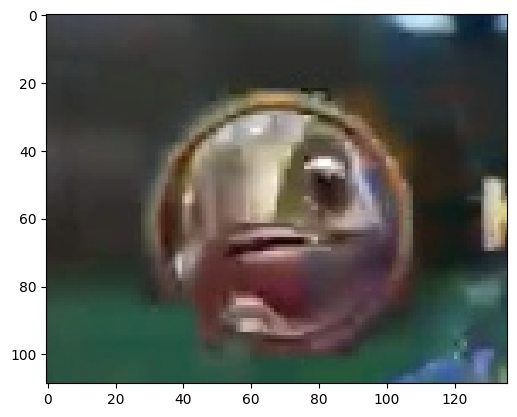

In [ ]:
template = cv2.imread("/content/template/Lux.png")
# img = cv2.imread("test_data/test_images/Jinx_1398331007194492_round1_Master-Yi_04-26-2021.mp4_28_0.jpg")
# img = cv2.imread("/content/test_data/test_images/Lux_1398331007194492_round1_Master-Yi_04-26-2021.mp4_1_1.jpg")
img = cv2.imread("/content/test_data/test_images/Fizz_20zGr1wVrzM_round2_Ezreal_05-27-2021_new.mp4_75_4.jpg")
img = crop_img(img)
plt.imshow(template)
plt.show()
plt.imshow(img)

In [ ]:
embeddings = np.array([embed_img(img), embed_img(template)])
embeddings.shape

(2, 1572864)

In [ ]:
get_cosine_similarity(embeddings)

array([[1.0001239, 1.0001239],
       [1.0001239, 1.0001239]], dtype=float32)

##imagededub

In [ ]:
!pip install imagededup

In [ ]:
from imagededup.methods import CNN
cnn = CNN()

# Generate encodings for all images in an image directory
encodings = cnn.encode_images(image_dir='/content/template')
encodings
# # Find duplicates using the generated encodings
# duplicates = phasher.find_duplicates(encoding_map=encodings)

# # plot duplicates obtained for a given file using the duplicates dictionary
# from imagededup.utils import plot_duplicates
# plot_duplicates(image_dir='/content/template',
#                 duplicate_map=duplicates,
#                 filename='ukbench00120.jpg')

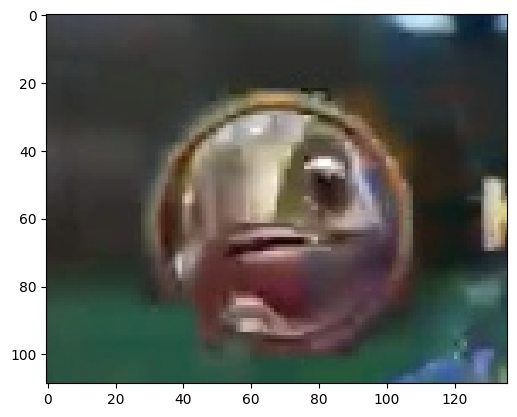

(576,)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# img = cv2.imread("test_data/test_images/Jinx_1398331007194492_round1_Master-Yi_04-26-2021.mp4_28_0.jpg")
# img = cv2.imread("/content/test_data/test_images/Lux_1398331007194492_round1_Master-Yi_04-26-2021.mp4_1_1.jpg")
img = cv2.imread("/content/test_data/test_images/Fizz_20zGr1wVrzM_round2_Ezreal_05-27-2021_new.mp4_75_4.jpg")
def crop_img(img_:np.ndarray, offset=0.25) -> np.ndarray:
    crop_pt = int(img_.shape[0]*(1+offset))
    return img_[:,:crop_pt] if len(img_.shape)==2 else img_[:,:crop_pt, :]

img = crop_img(img)
plt.imshow(img)
plt.show()
test_img_encoding = cnn._get_cnn_features_single(img)[0]
test_img_encoding.shape

In [ ]:
encoding_full = encodings.copy()
encoding_full["test_img"] = test_img_encoding
cnn.find_duplicates_to_remove(encoding_map=encoding_full, min_similarity_threshold=0.8)

/usr/local/lib/python3.9/dist-packages/imagededup/methods/cnn.py:443: RuntimeWarning: Parameter num_enc_workers has no effect since encodings are already provided
  warnings.warn('Parameter num_enc_workers has no effect since encodings are already provided', RuntimeWarning)
2023-04-03 09:44:28,282: INFO Start: Calculating cosine similarities...
INFO:imagededup.methods.cnn:Start: Calculating cosine similarities...
2023-04-03 09:44:28,286: INFO End: Calculating cosine similarities.
INFO:imagededup.methods.cnn:End: Calculating cosine similarities.


['Tristana.png',
 'Nami.png',
 'Yasuo.png',
 'Seraphine.png',
 'Soraka.png',
 'Sona.png',
 'Zed.png',
 'Ziggs.png',
 'Rakan.png']

**bold text**#Correct template after EDA